In [157]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [158]:
import xarray as xr
import xwmt
import numpy as np
import matplotlib.pyplot as plt

In [159]:
variables = ['hfds','wfo','tos','sos','areacello']

## CM4 data

In [160]:
rootdir = '/work/gam/wmt/xwmt_testdata/'
filename = 'xwmt_test_data.nc'

In [161]:
ds = xr.open_dataset(rootdir+filename,use_cftime=True)

In [162]:
ds = ds.rename({'xh': 'x', 'yh': 'y','geolat': 'lat', 'geolon': 'lon'})

In [191]:
cm4_swmt=swmt(ds)

In [ ]:
cm4_swmt.G(

In [207]:
lmin = 20
lmax = 30
dl = 0.5
bins = np.arange(lmin,lmax,dl)

In [208]:
G = xwmt.swmt(ds).G("sigma0",bins=bins)

In [209]:
G

<xarray.DataArray 'total' (time: 2, sigma0: 19)>
array([[-6.26613664e+06, -1.58751192e+07, -3.57665207e+07,
        -7.06014608e+07, -8.36632041e+07, -1.02109106e+07,
        -6.70463890e+07, -1.45700020e+07,  2.41276905e+07,
        -1.33204225e+08,  2.33171395e+07,  2.94693554e+07,
         2.21464684e+07, -1.44779069e+08, -4.00307920e+07,
         6.81211549e+07,  2.93893023e+07,  6.61955021e+05,
         2.61645267e+05],
       [-1.39703259e+07, -2.76466087e+07, -4.89913557e+07,
        -7.34240832e+07, -1.04430383e+08, -1.31250866e+08,
        -1.80772824e+08,  2.25139785e+06, -3.78487623e+07,
        -7.31621968e+06,  4.16913922e+07,  3.72299369e+07,
         7.18743519e+04, -5.28517378e+07,  3.84629378e+06,
         6.30618575e+07,  2.60707364e+07,  1.10960653e+06,
         2.01528137e+05]])
Coordinates:
  * time     (time) object 0101-01-16 12:00:00 0101-02-15 00:00:00
  * sigma0   (sigma0) float64 20.25 20.75 21.25 21.75 ... 28.25 28.75 29.25

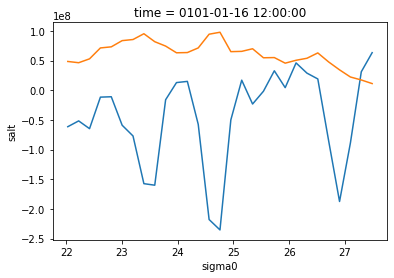

In [202]:
G['heat'].isel(time=0).plot()
G['salt'].isel(time=0).plot()

In [203]:
G["salt"].sum()

<xarray.DataArray 'salt' ()>
array(3.54514387e+09)

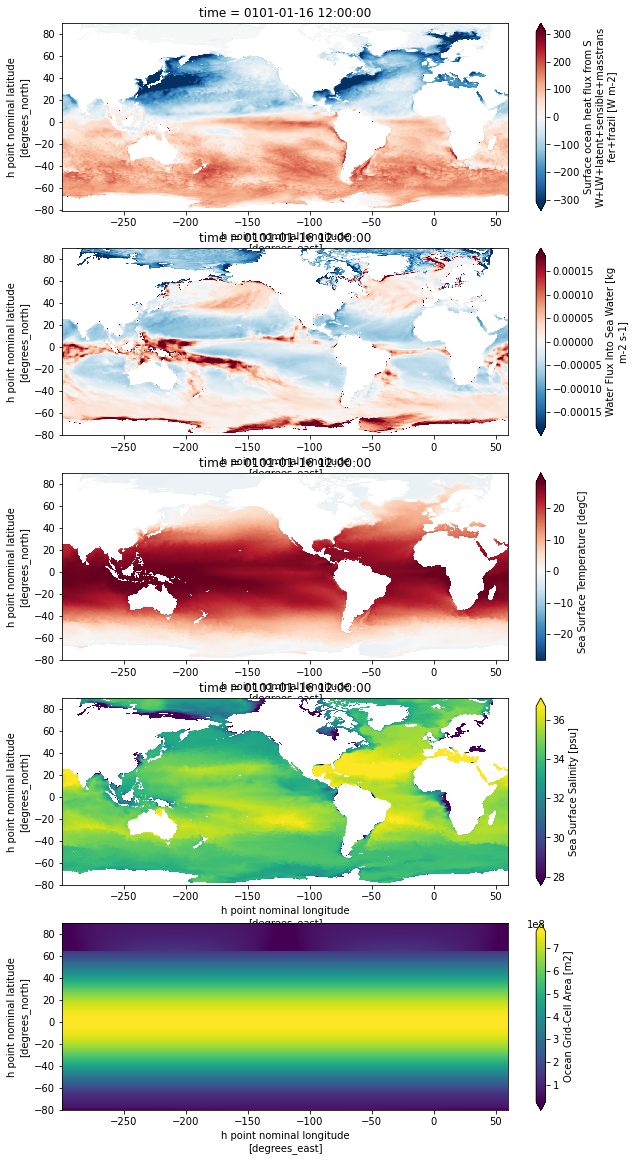

In [148]:
nv = len(variables)
fig,ax = plt.subplots(figsize=(10,4*nv),nrows=nv)
for i,variable in enumerate(variables):
    if "time" in ds[variable].dims:
        da = ds[variable].isel(time=0)
    else:
        da = ds[variable]
    da.plot(ax=ax[i],robust=True)

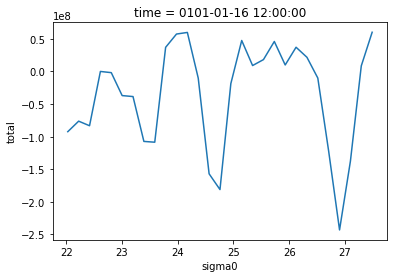

## JRA55 data

In [151]:
rootdir = '/work/gam/jra55/'
filename = 'jra55_1yr.en4.ds.zarr'
gridname = 'areacella_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0_gr.nc'

In [152]:
ds = xr.open_zarr(rootdir+filename)
grid = xr.open_dataset(rootdir+gridname)

In [153]:
ds["areacello"] = grid["areacella"].assign_coords({'lat':ds['lat'],'lon':ds['lon']})
ds["geolon"] = ds["lon"]*xr.ones_like(ds["lat"])
ds["geolon"] = ds["geolon"].transpose('lat','lon')
ds["geolat"] = ds["lat"]*xr.ones_like(ds["lon"])
ds["wet"] = np.isfinite(ds["sos"].isel(time=0)).drop('time')
ds["sfdsi"] = xr.zeros_like(ds["hfds"])

In [154]:
ds = ds.rename({'lon': 'x', 'lat': 'y','geolat': 'lat', 'geolon': 'lon'})

In [155]:
ds

<xarray.Dataset>
Dimensions:    (time: 12, y: 320, x: 640)
Coordinates:
    depth      float32 ...
  * y          (y) float64 -89.57 -89.01 -88.45 -87.89 ... 88.45 89.01 89.57
  * x          (x) float64 0.0 0.5625 1.125 1.688 ... 357.8 358.3 358.9 359.4
  * time       (time) datetime64[ns] 1958-01-16 1958-02-13 ... 1958-12-16
Data variables:
    hfds       (time, y, x) float32 dask.array<chunksize=(12, 320, 640), meta=np.ndarray>
    sos        (time, y, x) float32 dask.array<chunksize=(12, 320, 640), meta=np.ndarray>
    tos        (time, y, x) float32 dask.array<chunksize=(12, 320, 640), meta=np.ndarray>
    wfo        (time, y, x) float32 dask.array<chunksize=(12, 320, 640), meta=np.ndarray>
    areacello  (y, x) float32 ...
    lon        (y, x) float64 0.0 0.5625 1.125 1.688 ... 357.8 358.3 358.9 359.4
    lat        (y, x) float64 -89.57 -89.57 -89.57 -89.57 ... 89.57 89.57 89.57
    wet        (y, x) bool dask.array<chunksize=(320, 640), meta=np.ndarray>
    sfdsi      (time, y, x) float32 dask.array<chunksize=(12, 320, 640), meta=np.ndarray>

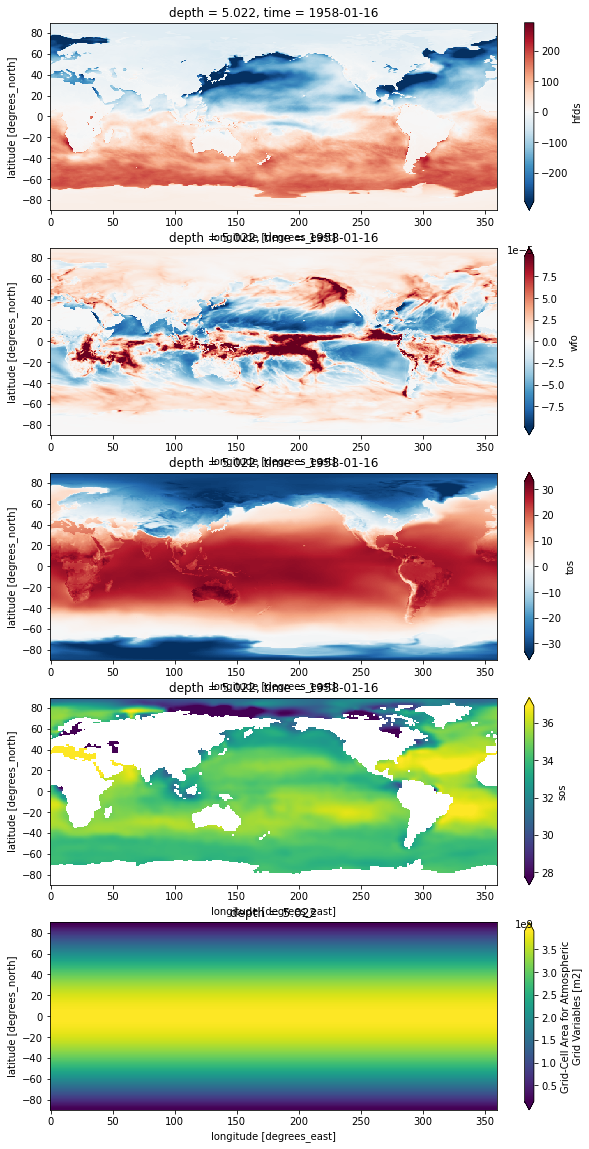

In [156]:
nv = len(variables)
fig,ax = plt.subplots(figsize=(10,4*nv),nrows=nv)
for i,variable in enumerate(variables):
    if "time" in ds[variable].dims:
        da = ds[variable].isel(time=0)
    else:
        da = ds[variable]
    da.plot(ax=ax[i],robust=True)

In [137]:
G = xwmt.swmt(ds).G("sigma0")

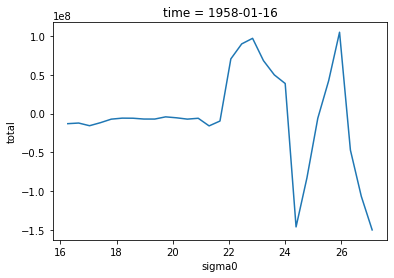

In [138]:
G.isel(time=0).plot()